In [11]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
#  Load dataset
uci_diabetes_df = pd.read_csv("uci_diabetes.csv")
pima_diabetes_df = pd.read_csv("pima_diabetes.csv")
uci_diabetes_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [12]:
# Univariate Analysis - UCI Diabetes Dataset
uci_diabetes_df.describe()



,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [13]:
# Univariate Analysis - Pima Indians Diabetes Dataset
pima_diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


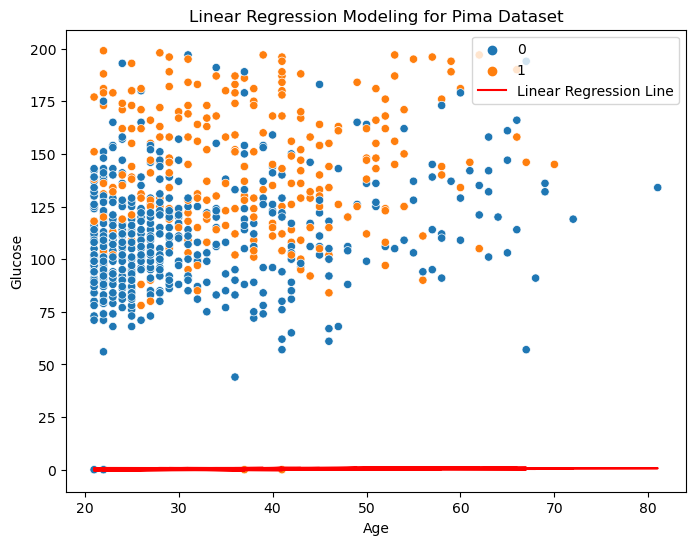

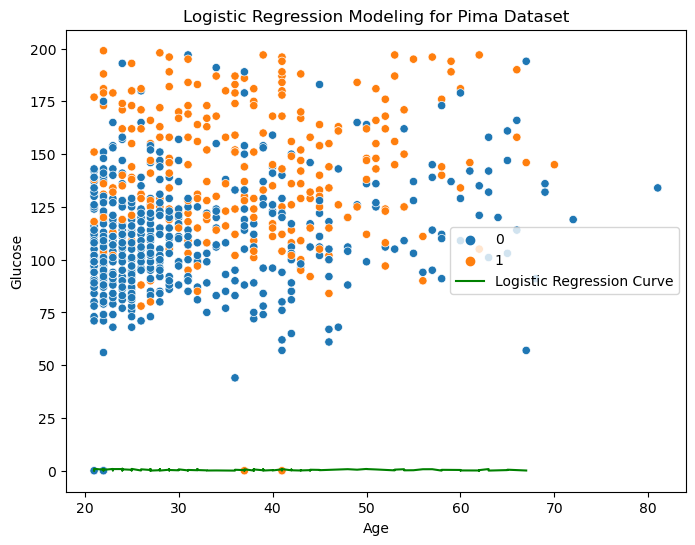


Logistic Regression Modeling for Pima Dataset:
Confusion Matrix:
[[86 13]
 [24 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        99
           1       0.70      0.56      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



In [29]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load Pima Indians Diabetes dataset
pima_diabetes_df = pd.read_csv("pima_diabetes.csv")  # Replace with the actual file path

# Bivariate Analysis - Linear Regression Modeling
X_linear_pima = sm.add_constant(pima_diabetes_df[['Age', 'Glucose']])
y_linear_pima = pima_diabetes_df['Outcome']
linear_model_pima = sm.OLS(y_linear_pima, X_linear_pima).fit()

# Bivariate Analysis - Logistic Regression Modeling
# Split the dataset into features (X) and target variable (y)
X_logistic_pima = pima_diabetes_df[['Age', 'Glucose']]
y_logistic_pima = pima_diabetes_df['Outcome']

# Split the data into training and testing sets
X_train_pima, X_test_pima, y_train_pima, y_test_pima = train_test_split(X_logistic_pima, y_logistic_pima, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_model_pima = LogisticRegression()
logistic_model_pima.fit(X_train_pima, y_train_pima)

# Predictions on the test set
y_pred_pima = logistic_model_pima.predict(X_test_pima)

# Plotting Linear Regression Line
plt.figure(figsize=(8, 6))


# Scatter plot
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=pima_diabetes_df)

# Linear Regression Line
plt.plot(X_linear_pima['Age'], linear_model_pima.predict(X_linear_pima), color='red', label='Linear Regression Line')

plt.title('Linear Regression Modeling for Pima Dataset')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

# Plotting Logistic Regression Curve
plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=pima_diabetes_df)

# Logistic Regression Curve
x_values = X_test_pima['Age'].sort_values()
y_probabilities = logistic_model_pima.predict_proba(X_test_pima)[:, 1]
plt.plot(x_values, y_probabilities, color='green', label='Logistic Regression Curve')

plt.title('Logistic Regression Modeling for Pima Dataset')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

# Display Logistic Regression Results
print("\nLogistic Regression Modeling for Pima Dataset:")
print("Confusion Matrix:")
print(confusion_matrix(y_test_pima, y_pred_pima))
print("\nClassification Report:")
print(classification_report(y_test_pima, y_pred_pima))



Logistic Regression Modeling for Pima Dataset (Multiple Features):
Confusion Matrix:
[[79 20]
 [20 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154


Multiple Regression Analysis Results:
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     73.69
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           8.17e-53
Time:                        15:25:54   Log-Likelihood:                -395.23
No. Observations:              

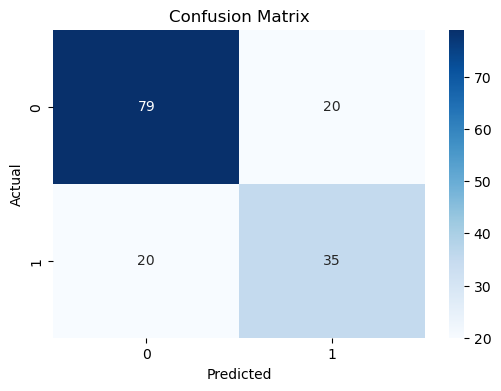

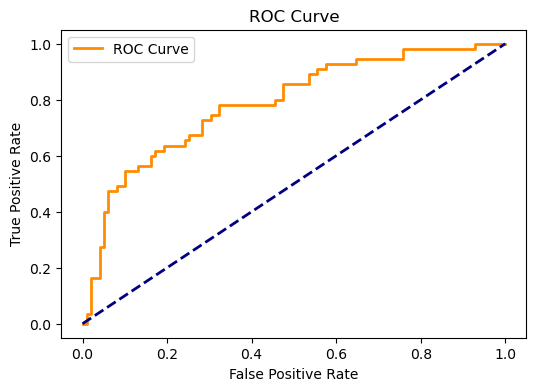


AUC Score: 0.7878787878787878


In [32]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Pima Indians Diabetes dataset
pima_diabetes_df = pd.read_csv("pima_diabetes.csv")  # Replace with the actual file path

# Multiple Regression Analysis
X_multi_pima = sm.add_constant(pima_diabetes_df[['Age', 'Glucose', 'BMI', 'BloodPressure']])
y_multi_pima = pima_diabetes_df['Outcome']

# Split the data into training and testing sets
X_train_multi_pima, X_test_multi_pima, y_train_multi_pima, y_test_multi_pima = train_test_split(X_multi_pima, y_multi_pima, test_size=0.2, random_state=42)

# Create a logistic regression model for multiple features
logistic_model_multi_pima = LogisticRegression()
logistic_model_multi_pima.fit(X_train_multi_pima, y_train_multi_pima)

# Predictions on the test set
y_pred_multi_pima = logistic_model_multi_pima.predict(X_test_multi_pima)

# Display Logistic Regression Results for Multiple Features
print("\nLogistic Regression Modeling for Pima Dataset (Multiple Features):")
print("Confusion Matrix:")
print(confusion_matrix(y_test_multi_pima, y_pred_multi_pima))
print("\nClassification Report:")
print(classification_report(y_test_multi_pima, y_pred_multi_pima))

# Display Multiple Regression Analysis Results
print("\nMultiple Regression Analysis Results:")
multi_model_pima = sm.OLS(y_multi_pima, X_multi_pima).fit()
print(multi_model_pima.summary())

# Confusion Matrix Plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_multi_pima, y_pred_multi_pima), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_prob_multi_pima = logistic_model_multi_pima.predict_proba(X_test_multi_pima)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_multi_pima, y_prob_multi_pima)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test_multi_pima, y_prob_multi_pima)
print(f"\nAUC Score: {auc_score}")
